In [18]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [26]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_date = '2017_11_21'
exp_name = '2017_11_21_16_53_44_loading-Iz-scan'
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[20],[5]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined


In [27]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [28]:
retention = q.apply_thresholds()

In [29]:
tbl_str = "ivar:\t{0:.3f}\tloading:{1:.2f}\tretention:{2:.3f} +- {3:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['loading'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	-0.100	loading:0.01	retention:1.000 +- 0.072
ivar:	-0.097	loading:0.02	retention:1.000 +- 0.024
ivar:	-0.094	loading:0.06	retention:0.900 +- 0.033
ivar:	-0.091	loading:0.05	retention:0.961 +- 0.023
ivar:	-0.089	loading:0.07	retention:0.851 +- 0.037
ivar:	-0.086	loading:0.06	retention:0.932 +- 0.028
ivar:	-0.083	loading:0.06	retention:0.946 +- 0.025
ivar:	-0.080	loading:0.06	retention:0.918 +- 0.030


In [30]:
q.save_experiment_data()

<IPython.core.display.Javascript object>


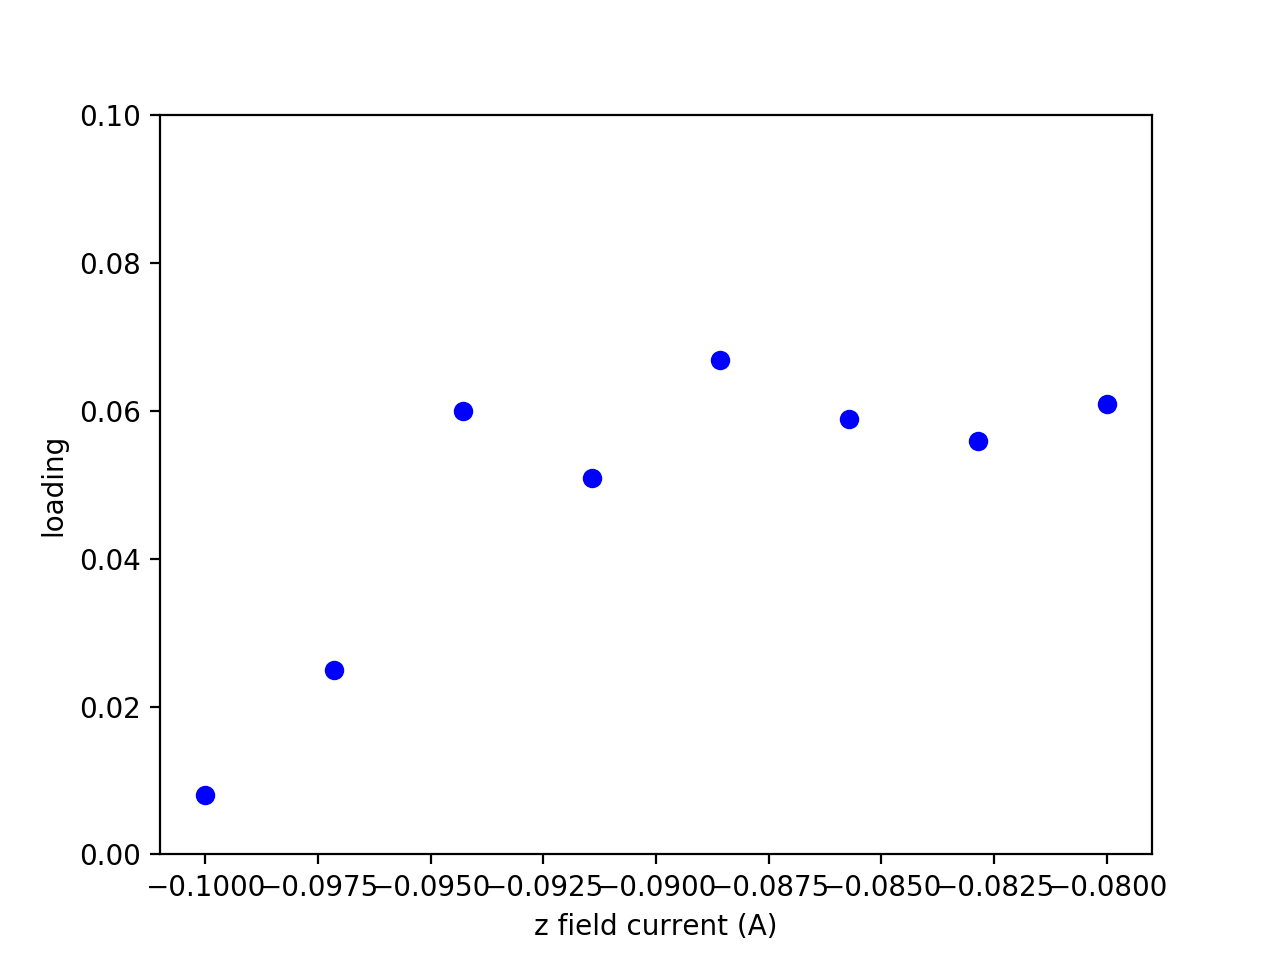

Text(0,0.5,u'loading')

In [33]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.plot(retention['ivar'][e], retention['loading'][e], 'bo')
ax.set_ylim(0, 0.1)
ax.set_xlabel(xlab)
ax.set_ylabel('loading')

<IPython.core.display.Javascript object>


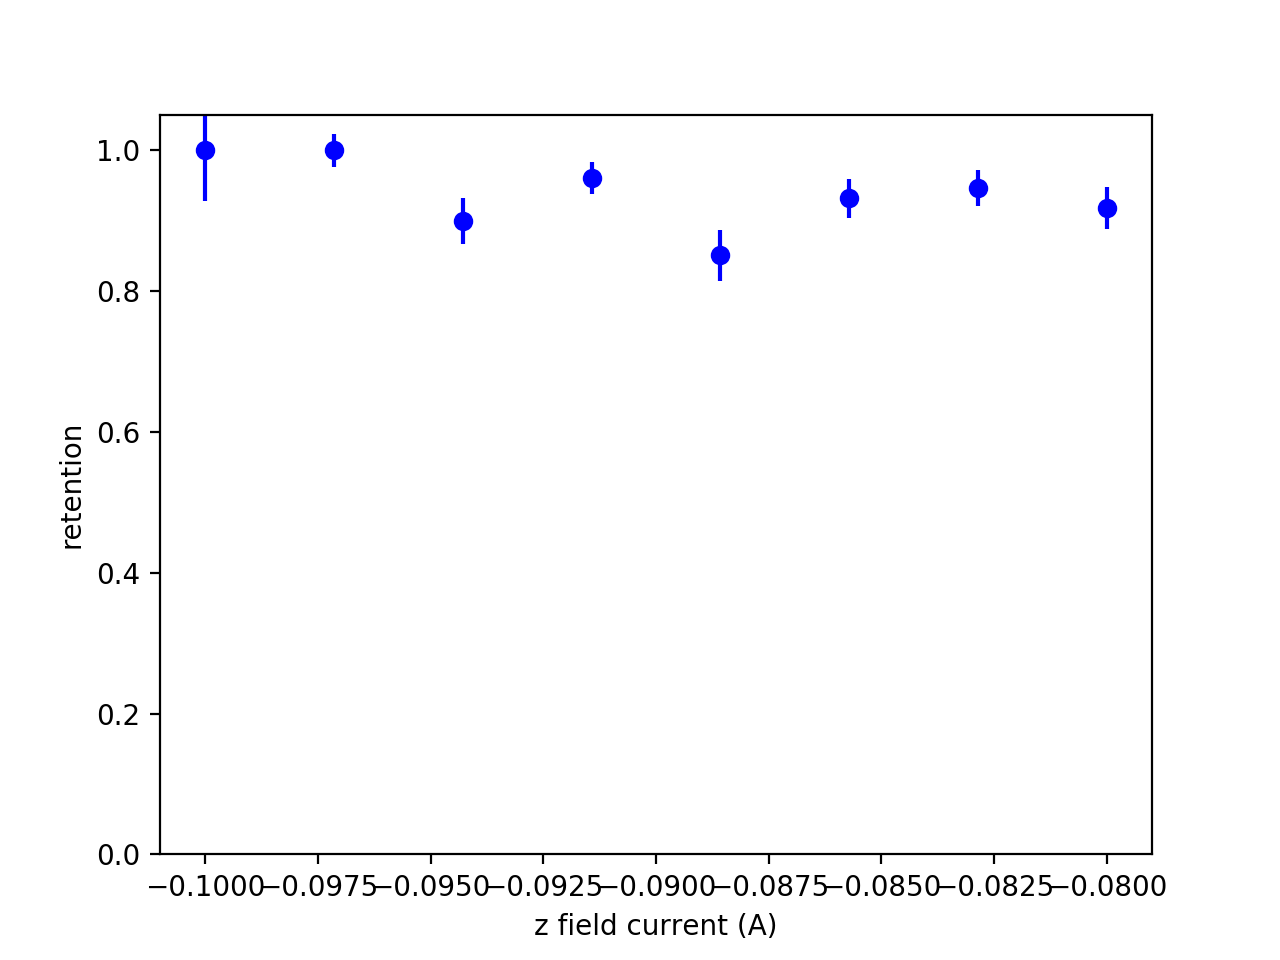

Text(0,0.5,u'retention')

In [32]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')